Data shape: (418, 12)
Columns: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154  

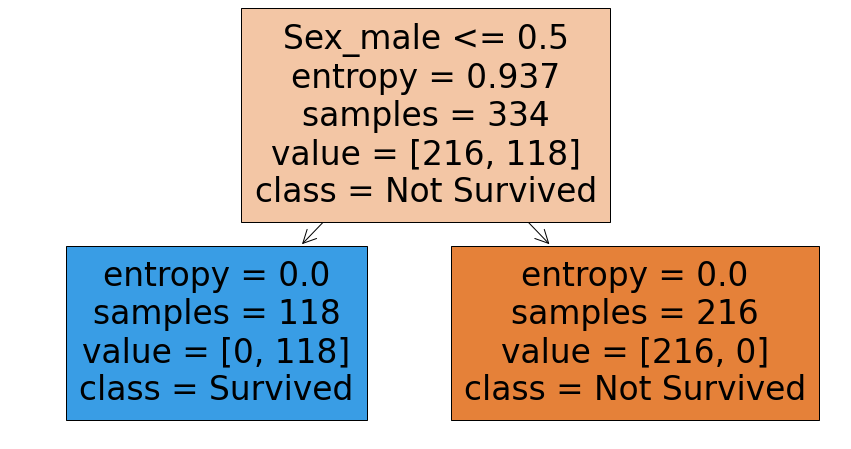

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("tested.csv")

print("Data shape:", data.shape)
print("Columns:", data.columns.tolist())
print(data.head())

data = data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, errors='ignore')
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = data[col].fillna(data[col].mode()[0])   # Fill categorical with most frequent
    else:
        data[col] = data[col].fillna(data[col].median())    # Fill numeric with median

data = pd.get_dummies(data, drop_first=True)

data = data.replace([np.inf, -np.inf], np.nan)
data = data.fillna(data.median())

if 'Survived' not in data.columns:
    raise ValueError("'Survived' column not found in dataset. Make sure your file includes it.")

X = data.drop('Survived', axis=1)
y = data['Survived']

X = X.astype(np.float32)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("\n✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(15,8))
plot_tree(model, filled=True, feature_names=X.columns, class_names=['Not Survived', 'Survived'])
plt.show()
